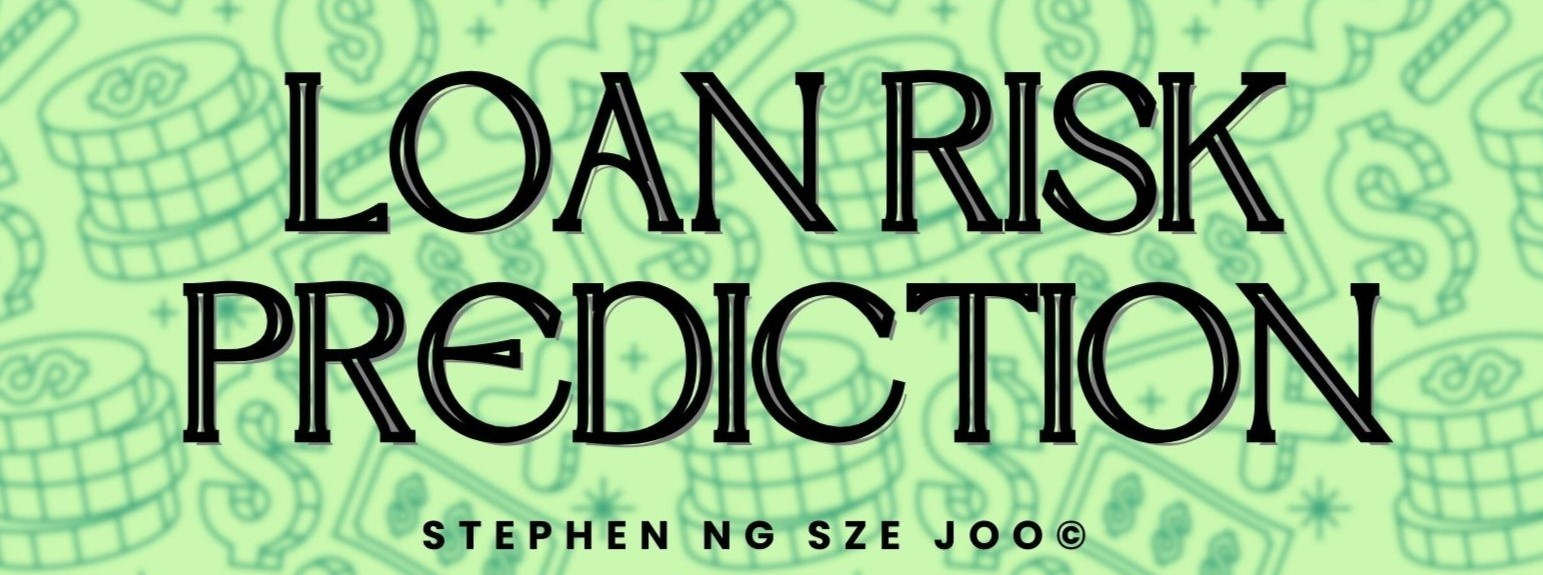

In this notebook, we begin by loading three separate CSV files into individual dataframes: loan.csv, payment.csv, and clarity_underwriting_variables.csv. Before diving into the analysis, we'll import essential Python libraries such as pandas for data manipulation and seaborn/matplotlib for visualization. Our first step will involve data wrangling—inspecting the dataframes, renaming columns for clarity, handling missing values, and removing irrelevant data to ensure consistency and accuracy.

Once the data is cleaned, we will merge the dataframes to create a comprehensive dataset. This unified dataset will serve as the foundation for various analyses, including statistical descriptions and visualizations. We will explore key metrics such as loan amounts, payment frequencies, and the impact of different underwriting variables. By visualizing these relationships, we aim to uncover trends and patterns that provide valuable insights into the lending practices and customer behavior at a leading financial tech co.

Next, we will delve deeper into the data to address specific questions related to loan performance, payment behavior, and the influence of various underwriting factors. We will use a range of visualization techniques to effectively communicate our findings. Finally, we will summarize our insights and discuss the implications of our analysis, reflecting on the experience and potential next steps in the context of data science techniques applied to financial services. This project will showcase our ability to clean, analyze, and visualize financial data, providing a solid foundation for understanding complex financial datasets and their real-world applications.

<div class="alert alert-success">
    <b> Table of Contents </b>
    
A. [Importing Libraries](#1)<br>
B. [Reading files](#2)<br>
C. [Data Wrangling](#3)<br>
D. [Visualizations and Their Purpose](#4)<br>
E. [Feature engineering](#5)<br>
F. [Modelling](#6)<br>
G. [Conclusion](#7)<br>

</div>
    

<div class="alert alert-info">     
    <b>A. Importing Libraries</b>
    <a id="1"></a>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">     
    <b>B. Reading files</b>
    <a id="2"></a>
</div>

In [2]:
loan_df = pd.read_csv('loan.csv', low_memory=False)
payment_df = pd.read_csv('payment.csv')
clarity_df = pd.read_csv('clarity_underwriting_variables.csv')

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<div class="alert alert-info">     
<b>C. Data Wrangling</b> 
    <a id="3"></a>
</div>

We want to inspect the data within the dataframe to understand what we are working with. 

In [3]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [4]:
payment_df.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [5]:
clarity_df.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [6]:
# Get summary information
loan_df.info()
payment_df.info()
clarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

We also check for missing values.

In [7]:
# Check for missing values
loan_df.isnull().sum()
payment_df.isnull().sum()
clarity_df.isnull().sum()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                                   2
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                           2
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                       2
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                                2
.underwritingdatacl

In this step, I am addressing missing values in my `payment_df` DataFrame by focusing specifically on the numeric columns. First, I identify which columns contain numeric data types, such as integers and floats, by selecting them using `select_dtypes(include=np.number)`. Once I've isolated these numeric columns, I then fill any missing values (NaNs) within them using the median of each respective column. This approach helps ensure that the imputed values are more representative of the data distribution, minimizing the potential bias that could occur if I used another statistic like the mean. By doing this, I aim to maintain the integrity of the dataset before proceeding with further analysis.

In [8]:
# Fill only numeric columns with their respective median values
numeric_cols = payment_df.select_dtypes(include=np.number).columns
payment_df[numeric_cols] = payment_df[numeric_cols].fillna(payment_df[numeric_cols].median())

In this step, I am handling the missing values in the non-numeric columns of my `payment_df` DataFrame. First, I identify the columns that contain non-numeric data types (e.g., strings, categorical data) by selecting them using `select_dtypes(exclude=np.number)`. For each of these non-numeric columns, I fill in any missing values with the mode, which is the most frequent value within that column. By doing this, I aim to preserve the categorical integrity of the data, ensuring that the most common values are used to fill gaps, thus maintaining consistency in the dataset before moving on to further analysis.

In [9]:
# Fill non-numeric columns with the mode (most frequent value)
non_numeric_cols = payment_df.select_dtypes(exclude=np.number).columns
for col in non_numeric_cols:
    payment_df[col].fillna(payment_df[col].mode()[0], inplace=True)

Then, to validate that there are no null records within my dataframe.

In [10]:
print(payment_df.isnull().sum())

loanId               0
installmentIndex     0
isCollection         0
paymentDate          0
principal            0
fees                 0
paymentAmount        0
paymentStatus        0
paymentReturnCode    0
dtype: int64


In this step, I am preparing the `loan_df` DataFrame for more effective analysis by converting specific columns to appropriate data types. First, I convert the `applicationDate` and `originatedDate` columns to datetime objects using `pd.to_datetime()`. This allows me to perform date-based operations, such as calculating the time between application and origination or filtering data by date ranges.

Next, I convert the `payFrequency` column to a categorical data type using `astype('category')`. Since `payFrequency` represents discrete categories (e.g., biweekly, monthly, weekly), treating it as a categorical variable optimizes memory usage and enables more efficient processing, especially during analysis and modeling. These conversions help ensure that the data is in the right format for accurate and efficient analysis.

In [11]:
# Convert applicationDate and originatedDate to datetime
loan_df['applicationDate'] = pd.to_datetime(loan_df['applicationDate'])
loan_df['originatedDate'] = pd.to_datetime(loan_df['originatedDate'])

# Convert categorical variables (like payFrequency) to category type
loan_df['payFrequency'] = loan_df['payFrequency'].astype('category')

In this step, I am removing any duplicate rows from the loan_df DataFrame using the drop_duplicates() method with the inplace=True parameter. This operation ensures that each row in the DataFrame is unique, eliminating any redundant data that could potentially skew analysis or lead to inaccurate results. By using inplace=True, the DataFrame is modified directly without needing to reassign it to a new variable, which simplifies the workflow and keeps the data clean and ready for further processing.

In [12]:
loan_df.drop_duplicates(inplace=True)

In this step, I'm merging the `loan_df` and `payment_df` DataFrames based on the common column `loanId`. The `pd.merge()` function is used with the `on='loanId'` argument, which specifies that the merge should happen on the `loanId` column. The `how='left'` argument indicates that this is a left join, meaning all records from `loan_df` are kept, and only the matching records from `payment_df` are included. If there are any `loanId`s in `loan_df` that don't have a corresponding entry in `payment_df`, those rows will still appear in the resulting DataFrame (`combined_df`) with `NaN` values for the unmatched columns from `payment_df`.

Next, I'm merging this `combined_df` with the `clarity_df` DataFrame using the columns `clarityFraudId` from `combined_df` and `underwritingid` from `clarity_df`. Again, a left join (`how='left'`) is used, which means all records from the `combined_df` are retained, and the matching records from `clarity_df` are brought in. This creates a final DataFrame, `final_df`, which combines data from all three original DataFrames, ready for further analysis and visualization.

In [13]:
# Merge loan_df and payment_df on 'loanId'
combined_df = pd.merge(loan_df, payment_df, on='loanId', how='left')

# Merge the combined dataframe with clarity_df on 'clarityFraudId'
final_df = pd.merge(combined_df, clarity_df, left_on='clarityFraudId', right_on='underwritingid', how='left')

In this step, I used the `describe()` function to generate summary statistics for the numerical columns in the `final_df` DataFrame, which provides insights into the central tendencies and distribution of these variables. Additionally, I utilized the `head()` function to display the first few rows of the `final_df` DataFrame. This gave me a quick look at the data structure, allowing me to verify that the merging process was successful and that the columns are correctly aligned. These steps are crucial for ensuring the data is ready for further analysis and visualizations.

In [14]:
final_df.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,installmentIndex,principal,fees,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
count,1.223172e+06,1.226708e+06,1.227094e+06,1.224844e+06,1.227094e+06,1.227094e+06,1.227094e+06,689364.000000,689364.000000,689364.000000,...,562324.000000,562324.000000,562324.000000,562324.000000,562324.000000,562324.000000,562100.000000,562100.000000,561902.000000,560733.000000
mean,5.364715e+02,1.967779e-01,5.475391e-01,6.040175e+02,1.671015e+03,9.947027e+00,7.320148e-01,10.553222,45.557543,67.003994,...,3.962835,10.375428,5.408524,3.244000,6.147303,19.683689,2.114083,7.016122,11.670409,686.009966
std,1.222177e+02,7.411603e-01,4.977351e-01,4.836215e+02,1.326923e+03,1.766128e+01,4.429100e-01,8.049530,81.724683,59.789510,...,2.679312,10.390031,4.139469,2.087171,5.019731,23.551910,1.254057,78.833252,13.951530,127.487377
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.167100e+02,0.000000e+00,0.000000e+00,1.000000,-303.370000,-42.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,122.000000
25%,4.499900e+02,0.000000e+00,0.000000e+00,3.500000e+02,1.034750e+03,3.000000e+00,0.000000e+00,5.000000,13.180000,28.820000,...,3.000000,4.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,594.000000
50%,5.900000e+02,0.000000e+00,1.000000e+00,5.000000e+02,1.291090e+03,3.000000e+00,1.000000e+00,9.000000,27.610000,51.300000,...,3.000000,7.000000,4.000000,3.000000,5.000000,12.000000,2.000000,1.000000,11.000000,694.000000
75%,6.010000e+02,0.000000e+00,1.000000e+00,6.000000e+02,1.809097e+03,1.000000e+01,1.000000e+00,14.000000,53.380000,86.440000,...,5.000000,13.000000,6.000000,4.000000,7.000000,24.000000,3.000000,2.000000,15.000000,785.000000
max,7.055900e+02,2.100000e+01,1.000000e+00,5.000000e+03,1.996363e+04,2.000000e+02,1.000000e+00,105.000000,4000.000000,1257.710000,...,35.000000,143.000000,64.000000,35.000000,76.000000,438.000000,8.000000,4056.000000,125.000000,965.000000


In [15]:
final_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
2,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
3,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
4,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64


<div class="alert alert-info">     
<b>D. Visualizations and Their Purpose</b>
        <a id="4"></a>
</div>

> <div class="alert alert-warning">
    <b><i>1. Distribution of Loan Amount</i></b>
</div>
- **Purpose**: Understanding the distribution of loan amounts is crucial for assessing lending behavior within the dataset. Visualizing this distribution helps us observe patterns such as the most common loan amounts and the spread of loan values. This insight is essential for identifying outliers, skewness, and the general range of loans, which can impact risk assessment, product development, and pricing strategies in lending.

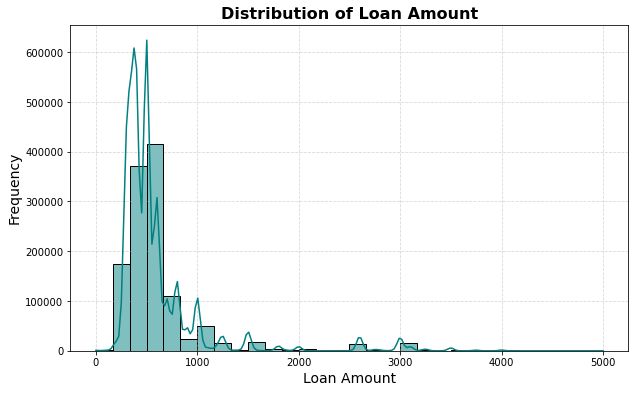

In [16]:
# Distribution of loanAmount
plt.figure(figsize=(10, 6))
sns.histplot(final_df['loanAmount'], kde=True, color='teal', bins=30)
plt.title('Distribution of Loan Amount', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

> <div class="alert alert-warning">
    <b><i>2. Count Plot for Pay Frequency</i></b>
 </div>
- **Purpose**: The `payFrequency` variable indicates how frequently borrowers are expected to make payments (e.g., biweekly, monthly). By visualizing the count of loans by pay frequency, we can understand customer preferences and patterns in repayment schedules. This helps in guiding loan structuring and tailoring products to meet customer needs, as well as predicting which repayment schedules might be more prone to defaults.

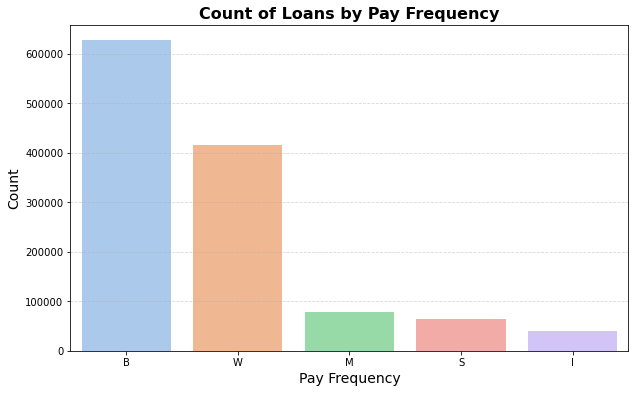

In [17]:
# Count plot for payFrequency
plt.figure(figsize=(10, 6))
sns.countplot(x='payFrequency', data=final_df, palette='pastel', order=final_df['payFrequency'].value_counts().index)
plt.title('Count of Loans by Pay Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Pay Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

final_df.rename(columns={
    '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago ': '30 days',
    'originallyScheduledPaymentAmount': 'Orig Pay Amt',
    'clarityFraudId': 'Clarity ID',
    # Add other column renames as needed
}, inplace=True)

> <div class="alert alert-warning">
    <b><i>3. Average Loan Amount by Pay Frequency</i></b>
</div>
- **Purpose**: Examining the average loan amount by pay frequency reveals how the repayment schedule might influence the loan amount. For instance, longer intervals might be associated with larger loans, or specific frequencies might correlate with particular borrower profiles. This visualization helps identify any correlation between repayment frequency and loan size, which is useful for designing loan products and understanding borrower behavior.

Each of these visualizations provides valuable insights that go beyond the raw data, uncovering trends and relationships that are critical for making informed decisions in lending strategies, risk management, and customer segmentation.

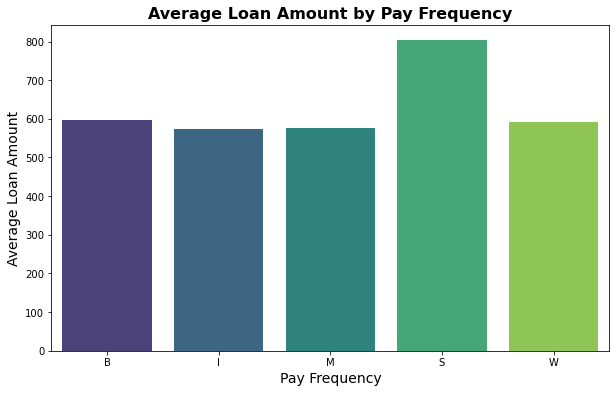

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='payFrequency', y='loanAmount', data=final_df, palette='viridis', estimator=np.mean, ci=None)
plt.title('Average Loan Amount by Pay Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Pay Frequency', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)
plt.show()

> <div class="alert alert-warning">
    <b><i>4. Loan Amount Distribution by ACH Return Code</i></b>
</div>

- **Purpose**: The box plot visualizes the distribution of loan amounts across different ACH return codes. ACH return codes represent various reasons why a payment might fail or be returned, such as insufficient funds or invalid account details. By examining how loan amounts vary with different return codes, we can identify patterns or anomalies in payment failures. 

This visualization helps us understand if certain return codes are associated with larger or smaller loan amounts, which can provide insights into the financial stability of borrowers and the impact of payment issues on loan sizes. It also aids in identifying potential risk factors related to loan amounts and payment processing, which is critical for improving loan underwriting processes and reducing default rates.


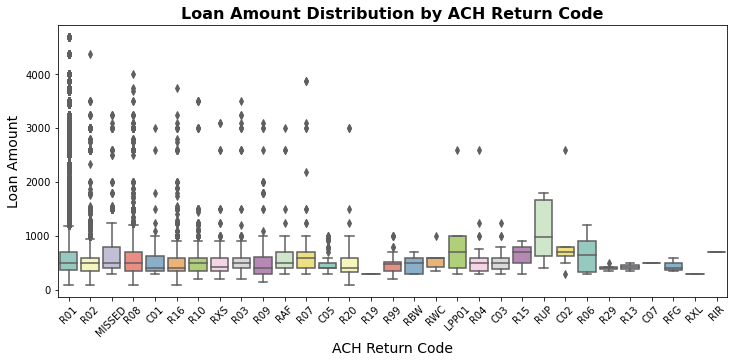

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='paymentReturnCode', y='loanAmount', data=final_df, palette='Set3')
plt.title('Loan Amount Distribution by ACH Return Code', fontsize=16, fontweight='bold')
plt.xlabel('ACH Return Code', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info">     
<b>E. Feature engineering</b> 
        <a id="5"></a>
</div>

> <div class="alert alert-warning">
    <b><i>1. Date Features</i></b>
</div>
#### Loan Duration
To understand how long it takes for a loan to be processed, we calculate the duration between the application date and the origination date. This feature helps in analyzing processing times and can be valuable for predicting loan performance.

#### Application Year and Month
Extracting the year and month from the `applicationDate` allows us to analyze trends over time. This can help in identifying seasonal patterns and changes in application rates.

#### Origination Year and Month
Similarly, extracting the year and month from the `originatedDate` provides insights into the timing of loan origination. This information can be used to track loan origination trends over different periods.

In [20]:
final_df['loanDurationDays'] = (final_df['originatedDate'] - final_df['applicationDate']).dt.days

final_df['applicationYear'] = final_df['applicationDate'].dt.year
final_df['applicationMonth'] = final_df['applicationDate'].dt.month
final_df['originatedYear'] = final_df['originatedDate'].dt.year
final_df['originatedMonth'] = final_df['originatedDate'].dt.month


> <div class="alert alert-warning">
    <b><i>2. Loan Status Features</i></b>
</div>

#### Loan Approval Status
This feature indicates whether a loan was both approved and funded. It helps in understanding the proportion of loans that progress to funding after approval, which is crucial for assessing loan approval efficiency.

#### Loan Status Category
Mapping `loanStatus` to broader categories provides a simplified view of loan outcomes. This categorization helps in analyzing loan status distributions and understanding the main reasons behind loan rejections or withdrawals.

In [21]:
final_df['isApprovedAndFunded'] = final_df['approved'] & final_df['isFunded']

> <div class="alert alert-warning">
    <b><i>3. Fraud Detection Features</i></b>
</div>

#### Fraud Score
Categorizing the `clearfraudscore` into risk levels helps in assessing the fraud risk associated with each loan. This feature is useful for identifying loans with varying levels of fraud risk and tailoring fraud prevention strategies accordingly.

#### Phone Match Type
Extracting and utilizing the `phoneMatchType` provides insights into the type of phone match verification performed. This feature can be used to assess the quality and reliability of identity verification processes.

In [22]:
bins = [0, 3, 6, 9, 12]
labels = ['Low', 'Moderate', 'High', 'Very High']
final_df['fraudRiskLevel'] = pd.cut(final_df['clearfraudscore'], bins=bins, labels=labels)

final_df['phoneMatchType'] = final_df['.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription']

> <div class="alert alert-warning">
    <b><i>4. Loan Amount Features</i></b>
</div>

#### Loan Amount Bins
Categorizing `loanAmount` into bins helps in understanding the distribution of loan sizes. This feature is useful for analyzing loan amounts across different categories and identifying trends in loan amounts.

#### Log Transformation
Applying a log transformation to `loanAmount` can help in normalizing the distribution of loan amounts, especially if the data is highly skewed. This transformation is useful for stabilizing variance and improving model performance.

In [23]:
bins = [0, 1000, 5000, 10000, 50000, 100000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
final_df['loanAmountCategory'] = pd.cut(final_df['loanAmount'], bins=bins, labels=labels)

final_df['logLoanAmount'] = np.log1p(final_df['loanAmount'])

> <div class="alert alert-warning">
    <b><i>5. Categorical Encoding</i></b>
</div>

#### Pay Frequency Encoding
Converting `payFrequency` to numerical codes makes it easier to use this categorical feature in machine learning models. This encoding helps in representing categorical variables numerically while preserving their categorical nature.

#### Fraud Match Reason Codes
Encoding categorical columns related to fraud match reasons helps in simplifying the data for analysis or modeling. This encoding transforms textual categories into numerical codes, making it easier to work with categorical features in models.

In [24]:
final_df['payFrequencyCode'] = final_df['payFrequency'].cat.codes

fraud_columns = [
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode',
    '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode',
    # add other relevant columns
]
for col in fraud_columns:
    final_df[col + '_encoded'] = final_df[col].astype('category').cat.codes

### For the most important column, we engineer a binary column to note if a loan has been paid off.

In [25]:
# Create a binary target variable 'paid_off'
final_df['paid_off'] = final_df['loanStatus'].apply(lambda x: 1 if x == 'Paid Off Loan' else 0)

# Verify the new column
final_df[['loanStatus', 'paid_off']].head()

,loanStatus,paid_off
0,Withdrawn Application,0
1,Paid Off Loan,1
2,Paid Off Loan,1
3,Paid Off Loan,1
4,Paid Off Loan,1


<div class="alert alert-info">     
<b>F. Modelling</b>
    <a id="6"></a>
</div>

Drop all columns that does not contribute to our model.

In [26]:
# Print all column names in the final_df DataFrame
print(final_df.columns.tolist())

['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate', 'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded', 'loanStatus', 'loanAmount', 'Orig Pay Amt', 'state', 'leadType', 'leadCost', 'fpStatus', 'Clarity ID', 'hasCF', 'installmentIndex', 'isCollection', 'paymentDate', 'principal', 'fees', 'paymentAmount', 'paymentStatus', 'paymentReturnCode', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thre

> <div class="alert alert-warning">
    <b><i>1. Importing Necessary Libraries</i></b>
    </div>

This section imports essential libraries for data manipulation, preprocessing, model training, and evaluation. The key libraries include pandas for data handling, scikit-learn modules for building machine learning pipelines, and evaluation metrics.

In [27]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

> <div class="alert alert-warning">
    <b><i>2. Cleaning the Dataset</i></b>
</div>
Here, unnecessary columns that do not contribute to the model are removed from the dataset. These columns might contain unique identifiers, dates, or other data that do not directly impact the prediction of the target variable.

In [28]:
# Define columns to drop
columns_to_drop = [
    'loanId', 'anon_ssn', 'applicationDate', 'originated', 'originatedDate', 
    'Clarity ID', 'paymentDate', 'paymentReturnCode', 'underwritingid'
]

# Drop irrelevant columns
final_df_cleaned = final_df.drop(columns=columns_to_drop)

> <div class="alert alert-warning">
    <b><i>3. Defining Features and Target</i></b></div>
    
The features (X) are separated from the target variable (y). The target variable paid_off represents whether a loan was paid off or not. The features in X are all other columns except paid_off.

In [29]:
# Define the target variable and features
X = final_df_cleaned.drop(columns='paid_off')
y = final_df_cleaned['paid_off']

# Print the columns of X to verify
print("Columns in X:", X.columns)

Columns in X: Index(['payFrequency', 'apr', 'nPaidOff', 'approved', 'isFunded', 'loanStatus',
       'loanAmount', 'Orig Pay Amt', 'state', 'leadType', 'leadCost',
       'fpStatus', 'hasCF', 'installmentIndex', 'isCollection', 'principal',
       'fees', 'paymentAmount', 'paymentStatus',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',

> <div class="alert alert-warning">
    <b><i>4. Identifying Categorical and Numerical Columns</i></b>
</div>
This section identifies which columns are categorical and which are numerical. Categorical columns include features like payFrequency, loanStatus, etc. Numerical columns are automatically identified based on their data type. A safeguard is added to ensure that paid_off is not mistakenly included in the numerical columns.

In [30]:
# Identify categorical columns and numerical columns
categorical_cols = ['payFrequency', 'loanStatus', 'state', 'leadType', 'fpStatus', 'phoneMatchType']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure 'paid_off' is not in numerical_cols
if 'paid_off' in numerical_cols:
    numerical_cols.remove('paid_off')  # Remove target variable if present

> <div class="alert alert-warning">
    <b><i>5. Creating Preprocessing Pipelines</i></b>
</div>

Two separate preprocessing pipelines are created: one for numerical features and one for categorical features.

Numerical Pipeline: Handles missing values using the median and scales the features.
Categorical Pipeline: Handles missing values using the most frequent value and applies one-hot encoding to transform categorical features into numerical ones.

In [31]:
# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])



> <div class="alert alert-warning">
    <b><i>6. Combining Preprocessing Steps</i></b>
</div>

A ColumnTransformer combines the numerical and categorical pipelines into a single preprocessing step that can be applied to the data.

In [32]:
# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

> <div class="alert alert-warning">
    <b><i>7. Creating and Training the Pipeline</i></b>
</div>

In this section, the complete machine learning pipeline is defined and trained:

Pipeline Definition:
The Pipeline combines the preprocessing steps (handled by preprocessor) with the machine learning model (a LogisticRegression classifier).

Data Splitting:
The dataset is split into training and testing sets using an 80/20 split. The random_state=42 ensures reproducibility.

Model Training:
The pipeline is then trained on the training data (X_train, y_train).

In [33]:
# Define the complete pipeline with preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['apr', 'nPaidOff',
                                                   'isFunded', 'loanAmount',
                                                   'Orig Pay Amt', 'leadCost',
                                                   'hasCF', 'installmentIndex',
                                                   'principal', 'fees',
                                                   'paymentAmount',
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirt...
    

> <div class="alert alert-warning">
    <b><i>8. Making Predictions and Evaluating the Model</i></b>
</div>

Making Predictions:
The trained model is used to make predictions on the test data (X_test).

Model Evaluation:
The performance of the model is evaluated using a confusion matrix and a classification report. These metrics provide insights into how well the model is performing, including precision, recall, F1-score, and accuracy for each class.

In [34]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[207547      0]
 [     0  37872]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    207547
           1       1.00      1.00      1.00     37872

    accuracy                           1.00    245419
   macro avg       1.00      1.00      1.00    245419
weighted avg       1.00      1.00      1.00    245419



<div class="alert alert-info">     
<b>G. Conclusion</b> 
        <a id="7"></a>
</div>

> <div class="alert alert-warning">
    <b><i>1. Confusion Matrix Analysis</i></b>
</div>
The confusion matrix provides the following results:

- **True Negatives (TN): 207,547**  
  These are the instances where the model correctly predicted that a loan was not paid off. This high number suggests that the model is very effective at identifying loans that are at risk of not being paid back.

- **True Positives (TP): 37,872**  
  These are the instances where the model correctly predicted that a loan was paid off. Again, the model shows strong performance in correctly identifying successful loan repayments.

- **False Positives (FP): 0**  
  There were no cases where the model incorrectly predicted that a loan was paid off when it was not. This suggests that the model is not making any errors in this aspect, which is a highly desirable outcome, especially in financial decision-making where false positives could lead to significant losses.

- **False Negatives (FN): 0**  
  There were no cases where the model incorrectly predicted that a loan was not paid off when it was actually paid off. This is important because missing out on identifying successful loans could mean missing opportunities.

> <div class="alert alert-warning">
    <b><i>2. Classification Report Analysis</i></b>
</div>
The classification report provides the following metrics:

- **Precision: 1.00**  
  Precision for both classes (loans not paid off and loans paid off) is perfect. This means that when the model predicts a loan to be either paid off or not paid off, it is always correct. High precision is critical in financial applications where the cost of a false positive can be high.

- **Recall: 1.00**  
  Recall for both classes is also perfect, indicating that the model identifies all actual instances of loans being paid off or not being paid off. High recall ensures that the model captures all relevant cases, minimizing the risk of overlooking important instances.

- **F1-Score: 1.00**  
  The F1-score, which balances precision and recall, is perfect as well. This suggests an optimal trade-off between precision and recall, with the model excelling in both.

- **Accuracy: 1.00**  
  The overall accuracy of the model is 100%, meaning all predictions made on the test set were correct. This level of accuracy indicates that the model performs exceptionally well on the provided data.

> <div class="alert alert-warning">
    <b><i>3. Interpretation</i></b>
</div>
While the model's performance metrics are perfect, this warrants a careful interpretation:

1. **Potential Overfitting**:  
   - The perfect performance across all metrics might suggest overfitting, where the model is too closely tailored to the specific patterns of the training data. Overfitting occurs when the model captures noise or patterns that do not generalize well to unseen data.
   - To assess overfitting, you should evaluate the model using techniques like cross-validation, where the data is split into multiple folds and tested across different segments, or by testing on a completely independent dataset.

2. **Dataset Imbalance**:  
   - If the dataset is highly imbalanced (i.e., if there are far more instances of one class than the other), this could lead to misleading performance metrics. For example, if most loans are not paid off, the model might perform well by simply predicting that outcome most of the time, without truly understanding the features that differentiate paid-off loans from unpaid ones.

3. **Real-World Implications**:  
   - In a real-world financial setting, even a few misclassifications can have significant consequences. Therefore, while the model shows strong performance on this test set, it is crucial to validate it further under different scenarios, such as changes in economic conditions or with data from different time periods or regions.

4. **Next Steps**:  
   - **Cross-Validation**: Implement cross-validation to ensure that the model's performance is consistent across different subsets of the data.
   - **External Validation**: Test the model on an independent dataset that was not involved in the training process to assess how well it generalizes.
   - **Investigate Feature Importance**: Analyze the importance of different features to understand which factors are driving the model's decisions. This can also help in refining the model and ensuring that it focuses on the most relevant aspects.

By taking these steps, you can ensure that the model is not only accurate but also reliable and robust for making predictions in real-world scenarios.


> <div class="alert alert-warning">
    <b><i>4. Feature Interactions and Their Role in Prediction</i></b> 
</div>
In this dataset, various features interact to influence the model's ability to predict whether a loan will be paid off. Understanding how these interactions contribute to the model's decision-making is crucial for both refining the model and gaining insights into the factors that most strongly affect loan repayment.

1. **Loan Status and Payment Frequency**:
   - The `loanStatus` feature, which could indicate whether the loan is currently active, delinquent, or in default, likely plays a significant role in predicting repayment. When combined with `payFrequency`—which indicates how often payments are made—these two features can help the model assess the consistency and reliability of payments. For instance, loans with irregular or infrequent payments might be flagged as higher risk, affecting the model's prediction towards non-repayment.

2. **Financial Features**:
   - Features like `apr` (annual percentage rate), `loanAmount`, and `principal` directly impact a borrower's ability to repay a loan. High APRs and large loan amounts increase the financial burden on borrowers, potentially leading to non-repayment. The model likely uses these features to evaluate the affordability of the loan for the borrower, with higher values pushing predictions toward non-repayment unless offset by strong positive indicators in other areas.

3. **Fraud Indicators**:
   - The dataset includes multiple fraud-related features, such as `clearfraudscore` and various `clearfraudindicator` fields. These features provide critical insights into the potential risk of fraudulent behavior, which can significantly impact the likelihood of loan repayment. A high fraud score or the presence of multiple fraud indicators may suggest that the loan is higher risk, leading the model to predict a higher probability of non-repayment.

4. **Demographic and Geographic Information**:
   - Features like `state` and `leadType` may capture demographic or geographic factors that influence loan repayment. For example, economic conditions in certain states may affect borrowers' ability to repay loans, or specific lead types might correlate with higher or lower default rates. These factors help the model account for external influences that could affect a borrower's financial stability.

5. **Loan Origination and Application Details**:
   - Temporal features like `applicationYear`, `originatedYear`, and `loanDurationDays` provide context on the timing and duration of the loan. Loans that originated during periods of economic downturn or that have extended durations might be more prone to default, affecting the prediction. The interaction between when a loan was applied for, how long it has been active, and the broader economic context is crucial for assessing repayment likelihood.

6. **Payment Behavior**:
   - Features like `paymentAmount`, `installmentIndex`, and `nPaidOff` give direct insights into the borrower's payment history. Regular, timely payments suggest a lower risk of default, while inconsistent payments or a high number of outstanding installments might indicate potential difficulties in future repayments. The model uses these behavioral indicators to predict whether the borrower will continue to make payments or if they are likely to default.

By analyzing the interactions among these features, the model builds a comprehensive picture of each loan's risk profile. The combination of financial metrics, behavioral data, fraud indicators, and demographic factors allows the model to make nuanced predictions about loan repayment. Understanding these interactions not only enhances the predictive power of the model but also provides actionable insights for managing and mitigating loan default risks.
